In [1]:
import torch
x= torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
# 等价于x=torch.arange(4.0,requires_grad=True),通过设置 requires_grad=True，后面求y关于x的梯度时用到。
x.requires_grad_(True)
print(x.grad)

None


In [3]:
# 向量的点积（内积等于x**2）
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
# 链式求导法则的求解方法：反向传递
# 正向传递：x->k->h->y,求出y的值。
# 反向传递：求解导数dy/dx的过程是逆向的，dy/dh*dh/dk*dk/dx.
# 正向就是求复合函数的值，反向就是求偏导数和梯度

In [5]:
# 反向传播计算梯度！！！
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
# dy/dx是标量/向量，结果是向量。
x.grad== 4*x

tensor([True, True, True, True])

In [7]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [8]:
# *：按位乘法
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
'''等价于y.backward(torch.ones(len(x)))：是一种用于计算非标量张量 y 相对于张量 x 的梯度的方法。
   它对 y 的每个元素进行加权求和，然后执行反向传播，最终得到 y 相对于 x 的梯度值。'''
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [13]:
x.grad.zero_()
y = x * x
# 固定y作为常数
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [14]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [29]:
def f(a):
    b = a
    while b.norm() < 1000:
        '''b的L2范数<1000, b的值等于a*(2**n)即k*a'''
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [35]:
# torch.randn:生成服从标准正态分布的随机数张量。
# size=():生成的张量的形状为一个空元组 ()，这表示生成一个标量（scalar）
a = torch.tensor([2.0, 3])
a.requires_grad_(True)
d = f(a)
d.sum().backward()
print(a, d, a.grad)
a.grad == d / a

tensor([2., 3.], requires_grad=True) tensor([1024., 1536.], grad_fn=<MulBackward0>) tensor([512., 512.])


tensor([True, True])

In [36]:
'''深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，
   执行它的反向传播函数，并访问得到的梯度。'''

'深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，\n   执行它的反向传播函数，并访问得到的梯度。'

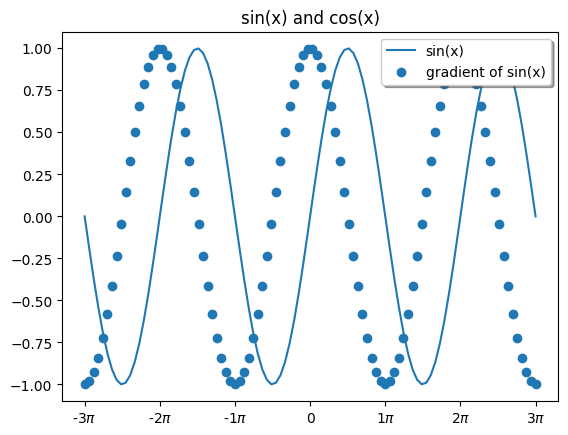

In [80]:
'''%matplotlib inline:这是一个 IPython 魔法命令（IPython magic command），用于在 Jupyter Notebook 或 IPython 环境中
   显示 matplotlib 图形，并将其嵌入到 notebook 中的单元格中。'''
%matplotlib inline
# 类似matlab绘图接口
import matplotlib.pylab as plt
# 自定义刻度格式& 设置主刻度的间隔为指定的倍数
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import torch
import inspect

# f：表示整个图形对象，可以用于设置图形的全局属性。
# ax：表示子图对象，可以用于设置子图的属性、添加绘图元素等操作。
f, ax = plt.subplots(1)
# print(inspect.getsource(plt.subplots)) # 查看源码

# 创建输入变量 x1，并设置需要计算梯度
'''np.linspace:生成一个等间距的包含 100 个点的数组 x，该数组范围从 -3π 到 3π'''
x = np.linspace(-3*np.pi, 3*np.pi, 100)
x1 = torch.tensor(x, requires_grad=True)
# 计算 sin(x1) 的值并对其求和
y1 = torch.sin(x1)
y1.sum().backward()  # 对 y1 求和的结果进行反向传播，计算梯度

# 绘制 sin(x) 曲线
ax.plot(x, np.sin(x), label='sin(x)')
# 绘制 sin(x) 在 x1 处的梯度
ax.scatter(x, x1.grad.numpy(), label="gradient of sin(x)")

ax.set_title('sin(x) and cos(x)')
# 添加图例(sin(x),gradient of sin(x)的label标记位置)
ax.legend(loc='upper right', shadow=True)

# 设置 x 轴刻度格式为 pi 的倍数(结果xπ，.g “一般”格式化)
ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val, pos: '{:.0g}$\pi$'.format(val / np.pi) if val != 0 else '0'
))

# 设置 x 轴主刻度为 pi 的倍数
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

# 显示图形
plt.show()

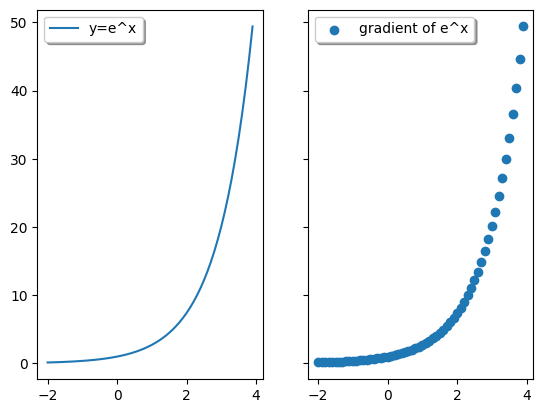

In [102]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import torch

# 绘制e^x函数
x= np.arange(-2, 4, 0.1)
x1 = torch.tensor(x, requires_grad=True)
y1 = torch.exp(x1)
# 计算相对于 x 的梯度
y1.sum().backward()

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
# 此处不能重复调用x1,y1，而应该用x和np.exp代替，或者用y.detach()定住，否则报错。
ax1.plot(x, np.exp(x), label='y=e^x')
ax2.scatter(x, x1.grad.numpy(), label= 'gradient of e^x')
ax1.legend(shadow=True)
ax2.legend(shadow=True)

plt.show()